# 机器人建模


## 基础概念

**正运动学**：已知角度求末端执行器位姿

**逆运动学**：已知位姿求解角度



**关节空间**

> 关节坐标是指描述机械臂中各个关节角度的坐标系。在关节坐标系中，每个关节的角度都被独立地表示出来，通过这些角度的变化，可以实现机械臂的运动。

**笛卡尔空间**

> 笛卡尔坐标系是一种常用的直角坐标系，它由三条相互垂直的坐标轴组成，分别为X轴、Y轴和Z轴。在笛卡尔坐标系中，任何点的位置都可以由这三个轴上的坐标值唯一确定。



**自由度**

手臂：7自由度；腿：6自由度

定义：刚体本身具有可独立运动方向的数目。

$$
F = 6(l - n - 1) + \sum_{i = 1}^{n}f_{i} \\
l为连杆数（包括基座），n为关节总数，f_i为第i个关节的自由度数
$$



6自由度DOF 8个解

7个自由度DOF 无穷多个解

<img src="https://philfan-pic.oss-cn-beijing.aliyuncs.com/img/017a2277142fe6ab01f933ad81c3e281_1440w.webp" alt="img" style="zoom:50%;" />

> 一个6自由度的机械手，即使某两组构型对应的末端机构的三维位置相同，机械手在从一个构型移动到另一个构型的时候无法保持末端机构始终不动。
>
> 
>
> 如果有人在电视里看过工业机器人焊东西的话，就会发现它在同一个位置焊接的时候，一会儿整个扭到这边，一会儿整个扭到那边，看起来非常酷炫的样子。事实上这么做只是因为，虽然焊接只是想改变末端机构的朝向，而不改变末端机构的位置，但是由于定理的限制，它必须要往后退一些，然后各种扭，才能保证在移动末端机构的朝向的过程中不会撞到东西，因为移动的时候末端机构的三维位置一定会乱动。如果它能够随便转一点点就可以达到目的，还费那个力气酷炫地整体都转起来干啥……
>
> 
>
> 而多了一个自由度以后就不一样了。
>
> 
>
> 想想开门时拧钥匙的动作，这个情况下是人胳膊的末端机构（手）的三维位置没有变（始终在钥匙孔前），但是末端机构（手）的三维旋转变了（转动了钥匙）。人能够实现这个简单的动作，就是因为我们的胳膊有7个自由度。




## 坐标系


## 坐标系变换

### 平面
平面坐标系坐标转换，顺时针旋转

$$
R(\theta) = \begin{bmatrix}
\cos(\theta) & -\sin(\theta) \\
\sin(\theta) & \cos(\theta)
\end{bmatrix}
$$

其中，\(\theta\) 是旋转角度。

- 互为转置
- 互为逆阵
- 正交阵
- 传导性


### 转动

> 记忆变换矩阵的方法，已知一个轴是不动的，不动的轴分量为1，利用线代的知识，只需列写变换后的基向量的坐标即可推出矩阵
>
> [3blue1Brown视频-矩阵与线性变换_哔哩哔哩_bilibili](https://www.bilibili.com/video/BV1ib411t7YR?p=4&vd_source=8b7a5460b512357b2cf80ce1cefc69f5)

!!! note "绕x，绕z都正常，绕y反一下"

#### 桶滚 `roll`



![在这里插入图片描述](https://philfan-pic.oss-cn-beijing.aliyuncs.com/img/20190410212347423.gif)

x轴不变，滚动（Roll)的旋转矩阵：

$$
\begin{bmatrix}
1 & 0 & 0 \\
0 & \cos\phi & -\sin\phi \\
0 & \sin\phi & \cos\phi
\end{bmatrix}
$$

#### 俯仰 `pitch`

![在这里插入图片描述](https://philfan-pic.oss-cn-beijing.aliyuncs.com/img/20190410212338361.gif)

y轴不变，俯仰（Pitch)的旋转矩阵：

$$
\begin{bmatrix}
\cos\theta & 0 & \sin\theta \\
0 & 1 & 0 \\
-\sin\theta & 0 & \cos\theta
\end{bmatrix}
$$

#### 偏摆 `yaw`

![在这里插入图片描述](https://philfan-pic.oss-cn-beijing.aliyuncs.com/img/20190410212324456.gif)

z轴不变，偏摆（Yaw）的旋转矩阵：

$$
\begin{bmatrix}
\cos\psi & -\sin\psi & 0 \\
\sin\psi & \cos\psi & 0 \\
0 & 0 & 1
\end{bmatrix}
$$

其中，$\phi$表示滚动角，$\theta$表示俯仰角，$\psi$表示偏摆角。这些矩阵分别表示了绕X轴、Y轴和Z轴的旋转。

![img](https://philfan-pic.oss-cn-beijing.aliyuncs.com/img/v2-9e1b5ce7917863ea39d34e84f3884faa_1440w.webp)

### Z-Y-X欧拉角

如果有一点 P绕原点依次作**滚动、俯仰和偏摆**，其位置将变成

$$
\begin{bmatrix}
\cos\psi \cos\theta & -\sin\psi \cos\phi + \cos\psi \sin\theta \sin\phi & \sin\psi \sin\phi + \cos\psi \sin\theta \cos\phi \\
\sin\psi \cos\theta & \cos\psi \cos\phi + \sin\psi \sin\theta \sin\phi & -\cos\psi \sin\phi + \sin\psi \sin\theta \cos\phi \\
-\sin\theta & \cos\theta \sin\phi & \cos\theta \cos\phi
\end{bmatrix}
$$

其中，$\phi$表示滚动角（roll），$\theta$表示俯仰角（pitch），$\psi$表示偏摆角（yaw）。这个矩阵表示了从世界坐标系到机体坐标系的变换。


![](https://philfan-pic.oss-cn-beijing.aliyuncs.com/img/20240911145615.png)

- xyz为全局坐标，保持不动；
- XYZ为局部坐标，随着物体一起运动。


??? note "例子"
    如果使用矩阵来表示正运动学，我们可以将机械臂的关节角度和位置表示为向量，然后使用旋转矩阵和变换矩阵来进行计算。<br>
    对于一个只有两个关节的机械臂，我们可以将关节角度表示为一个二维向量$\theta = \begin{bmatrix} \theta_1 \\ \theta_2 \end{bmatrix}$。然后，我们可以使用两个旋转矩阵来表示每个关节的旋转。<br>
    第一个关节的旋转矩阵为：<br>

    $$
    R_1(\theta_1) = \begin{bmatrix}
    \cos\theta_1 & -\sin\theta_1 & 0 \\
    \sin\theta_1 & \cos\theta_1 & 0 \\
    0 & 0 & 1
    \end{bmatrix}
    $$

    第二个关节的旋转矩阵为：<br>
    
    $$
    R_2(\theta_2) = \begin{bmatrix}
    \cos\theta_2 & 0 & \sin\theta_2 \\
    0 & 1 & 0 \\
    -\sin\theta_2 & 0 & \cos\theta_2
    \end{bmatrix}
    $$
    
    然后，我们可以将这两个旋转矩阵相乘，得到总的旋转矩阵：<br>
    
    $$
    R(\theta) = R_2(\theta_2) \cdot R_1(\theta_1) = \begin{bmatrix}
    \cos\theta_1\cos\theta_2 & -\sin\theta_1\cos\theta_2 & \sin\theta_2 \\
    \sin\theta_1 & \cos\theta_1 & 0 \\
    -\cos\theta_1\sin\theta_2 & \sin\theta_1\sin\theta_2 & \cos\theta_2
    \end{bmatrix}
    $$
    
    接下来，我们可以使用变换矩阵将机械臂的关节长度考虑进去。假设第一个关节的长度为$L_1$，第二个关节的长度为$L_2$，则变换矩阵为：<br>
    
    $$
    T = \begin{bmatrix}
    1 & 0 & 0 & L_1 \\
    0 & 1 & 0 & 0 \\
    0 & 0 & 1 & L_2 \\
    0 & 0 & 0 & 1
    \end{bmatrix}
    $$
    
    最后，我们可以将旋转矩阵和变换矩阵相乘，得到机械臂末端位置的齐次变换矩阵：<br>
    
    $$
    H(\theta) = T \cdot R(\theta) = \begin{bmatrix}
    \cos\theta_1\cos\theta_2 & -\sin\theta_1\cos\theta_2 & \sin\theta_2 & L_1\cos\theta_1\cos\theta_2 + L_2\sin\theta_2 \\
    \sin\theta_1 & \cos\theta_1 & 0 & L_1\sin\theta_1 \\
    -\cos\theta_1\sin\theta_2 & \sin\theta_1\sin\theta_2 & \cos\theta_2 & L_1\cos\theta_1\sin\theta_2 - L_2\cos\theta_2 \\
    0 & 0 & 0 & 1
    \end{bmatrix}
    $$
    
    通过这个齐次变换矩阵，我们可以得到机械臂末端在笛卡尔坐标系中的位置，它表示为矩阵的最后一列。例如，如果我们已知关节角度$\theta_1 = \frac{\pi}{4}$和$\theta_2 = \frac{\pi}{3}$，以及关节长度$L_1 = 1$米和$L_2 = 2$米，我们可以代入矩阵计算得到：
    
    $$
    H\left(\frac{\pi}{4}, \frac{\pi}{3}\right) = \begin{bmatrix}
    \frac{\sqrt{2}}{2}\frac{\sqrt{3}}{2} & -\frac{\sqrt{2}}{2}\frac{\sqrt{3}}{2} & \frac{\sqrt{3}}{2} & \frac{3\sqrt{6}}{4} \\
    \frac{\sqrt{2}}{2} & \frac{\sqrt{2}}{2} & 0 & \frac{\sqrt{2}}{2} \\
    -\frac{\sqrt{2}}{2}\frac{\sqrt{3}}{2} & \frac{\sqrt{2}}{2}\frac{\sqrt{3}}{2} & \frac{\sqrt{3}}{2} & -\frac{\sqrt{6}}{4} \\
    0 & 0 & 0 & 1
    \end{bmatrix}
    $$
    
    因此，机械臂末端的位置在笛卡尔坐标系中为$\left(\frac{3\sqrt{6}}{4}, \frac{\sqrt{2}}{2}, -\frac{\sqrt{6}}{4}\right)$，与之前使用方程计算得到的结果一致。<br>
    
    这个例子展示了如何使用矩阵来表示和计算正运动学，这种方法在处理更复杂的机械臂系统时非常有用。<br>

#### 万向节死锁（Gimbal Lock）
!!! note "简单例子"
    [无伤理解欧拉角中的“万向死锁”现象](https://www.bilibili.com/video/BV1Nr4y1j7kn)
    站起来，y轴朝天，x轴两臂，z轴朝前；
    顺序：YXZ：沿Y轴转，就是转下身；沿X轴转，就是抬头；沿Z轴转，就是保持脸的朝向不变，把头扭一下，就像歪头一样
    
    那么接下来按照以下顺序转：转身转过随便一个角度，然后抬头90度直朝天，然后再随便歪头歪一个角度（注意歪头时脸的朝向是不变的）那么你就会发现，歪头的效果跟开始转身的效果是一样的如果歪头的角度和转身的角度相等但是方向相反，那么就可以相互抵消

对欧拉角的变换是有序的 。欧拉角只记录结果，不记录过程

欧拉角描述相对于初始状态的变换，只和最终状态有关，与过程无关。（外边的轴转动会带动里面的轴转动）


### 四元数

四维空间中的双旋转


[四元数的可视化-3b1b](https://www.bilibili.com/video/BV1SW411y7W1/)

[四元数和三维转动2-3b1b](https://www.bilibili.com/video/BV1Lt411U7og/)

[Visualizing quaternions, an explorable video series](https://eater.net/quaternions)

[三维旋转：欧拉角、四元数、旋转矩阵、轴角之间的转换 - 知乎](https://zhuanlan.zhihu.com/p/45404840)

[欧拉角（易理解）](https://blog.csdn.net/ODDYOU/article/details/119976130)

[评论区pdf](https://krasjet.github.io/quaternion/)

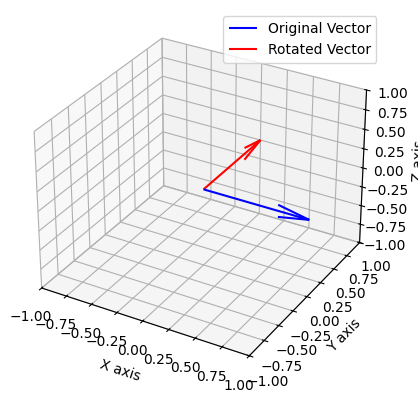

In [1]:
import numpy as np
from scipy.spatial.transform import Rotation as R
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 创建一个 3D 绘图
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 定义一个向量
vec = np.array([1, 0, 0])

# 绘制原始向量
ax.quiver(0, 0, 0, vec[0], vec[1], vec[2], color='b', label='Original Vector')

# 定义一个四元数 (90度绕z轴旋转)
r = R.from_quat([0, 0, np.sin(np.pi/4), np.cos(np.pi/4)])

# 旋转向量
rotated_vec = r.apply(vec)

# 绘制旋转后的向量
ax.quiver(0, 0, 0, rotated_vec[0], rotated_vec[1], rotated_vec[2], color='r', label='Rotated Vector')

# 设置坐标轴限制
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])

# 添加标签
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

# 显示图例
ax.legend()

# 显示绘图
plt.show()
